# **Data Preprocessing**

>  # Importing The Dataset

In [196]:
fish = read.csv("https://raw.githubusercontent.com/PrinceShamim022/Fisheries_DataAnalysis_Projects/main/Marine%20Fish/Fish.csv")
head(fish)
str(fish)
dim(fish)

,Species,Weight,Length1,Length2,Length3,Height,Width
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Bream,242,23.2,25.4,30.0,11.5200,4.0200
2,Bream,290,24.0,26.3,31.2,12.4800,4.3056
3,Bream,340,23.9,26.5,31.1,12.3778,4.6961
4,Bream,363,26.3,29.0,33.5,12.7300,4.4555
5,Bream,430,26.5,29.0,34.0,12.4440,5.1340
6,Bream,450,26.8,29.7,34.7,13.6024,4.9274


'data.frame':	159 obs. of  7 variables:
 $ Species: chr  "Bream" "Bream" "Bream" "Bream" ...
 $ Weight : num  242 290 340 363 430 450 500 390 450 500 ...
 $ Length1: num  23.2 24 23.9 26.3 26.5 26.8 26.8 27.6 27.6 28.5 ...
 $ Length2: num  25.4 26.3 26.5 29 29 29.7 29.7 30 30 30.7 ...
 $ Length3: num  30 31.2 31.1 33.5 34 34.7 34.5 35 35.1 36.2 ...
 $ Height : num  11.5 12.5 12.4 12.7 12.4 ...
 $ Width  : num  4.02 4.31 4.7 4.46 5.13 ...


[1] 159   7

**Describtion of each column names:**

* Species: species measured, there are seven in total.
* Weight: Fish weight in grams.
* Length1: vertical length in cm.
* Length2: diagonal length in cm.
* Length3: cross length in cm.
* Height: Height in cm.
* Width: diagonal width in cm.

> # Checking for Missing Variables  

In [197]:
any(is.na(fish))

summary(fish)

[1] FALSE

   Species              Weight          Length1         Length2     
 Length:159         Min.   :   0.0   Min.   : 7.50   Min.   : 8.40  
 Class :character   1st Qu.: 120.0   1st Qu.:19.05   1st Qu.:21.00  
 Mode  :character   Median : 273.0   Median :25.20   Median :27.30  
                    Mean   : 398.3   Mean   :26.25   Mean   :28.42  
                    3rd Qu.: 650.0   3rd Qu.:32.70   3rd Qu.:35.50  
                    Max.   :1650.0   Max.   :59.00   Max.   :63.40  
    Length3          Height           Width      
 Min.   : 8.80   Min.   : 1.728   Min.   :1.048  
 1st Qu.:23.15   1st Qu.: 5.945   1st Qu.:3.386  
 Median :29.40   Median : 7.786   Median :4.248  
 Mean   :31.23   Mean   : 8.971   Mean   :4.417  
 3rd Qu.:39.65   3rd Qu.:12.366   3rd Qu.:5.585  
 Max.   :68.00   Max.   :18.957   Max.   :8.142  

So there are no missing values in the dataset. But, the minimum value of Weight is 0 which is impossible and those record should not be counted in the analysis.

> # Filtering Dataset

In [198]:
weight0<- fish %>%
    filter(Weight == 0)

weight0

Species,Weight,Length1,Length2,Length3,Height,Width
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Roach,0,19,20.5,22.8,6.4752,3.3516


In [199]:
fish <- fish%>%
  filter(Weight>0)

In [200]:
summary(fish)

   Species              Weight          Length1         Length2     
 Length:158         Min.   :   5.9   Min.   : 7.50   Min.   : 8.40  
 Class :character   1st Qu.: 121.2   1st Qu.:19.15   1st Qu.:21.00  
 Mode  :character   Median : 281.5   Median :25.30   Median :27.40  
                    Mean   : 400.8   Mean   :26.29   Mean   :28.47  
                    3rd Qu.: 650.0   3rd Qu.:32.70   3rd Qu.:35.75  
                    Max.   :1650.0   Max.   :59.00   Max.   :63.40  
    Length3          Height           Width      
 Min.   : 8.80   Min.   : 1.728   Min.   :1.048  
 1st Qu.:23.20   1st Qu.: 5.941   1st Qu.:3.399  
 Median :29.70   Median : 7.789   Median :4.277  
 Mean   :31.28   Mean   : 8.987   Mean   :4.424  
 3rd Qu.:39.67   3rd Qu.:12.372   3rd Qu.:5.587  
 Max.   :68.00   Max.   :18.957   Max.   :8.142  

Now the minimum value of Weight has been changed, and we are good to go.

> # Outlier Detection

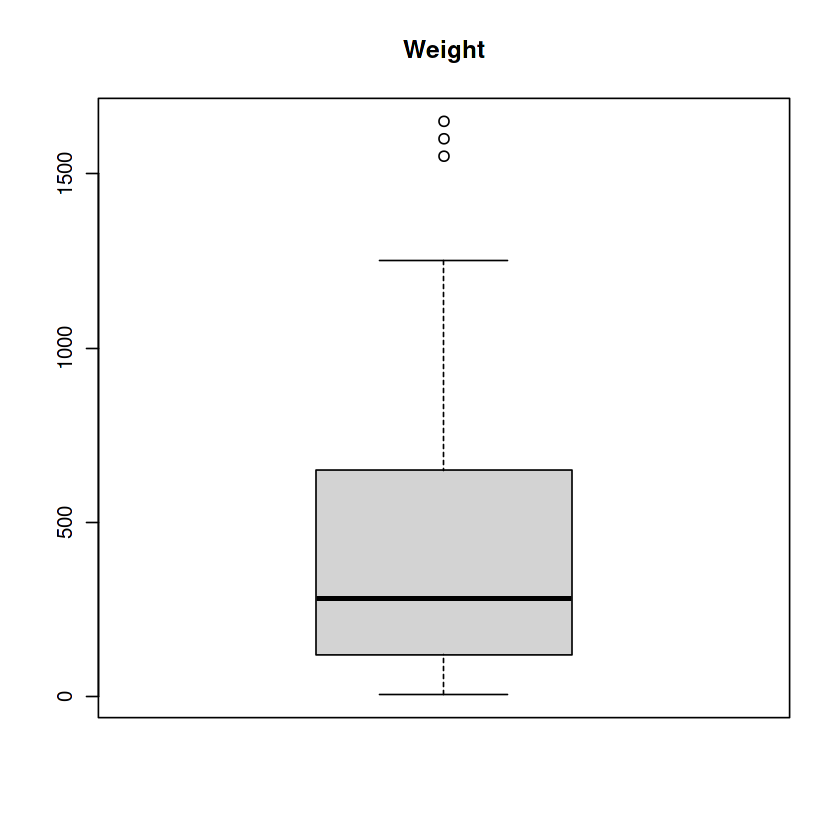

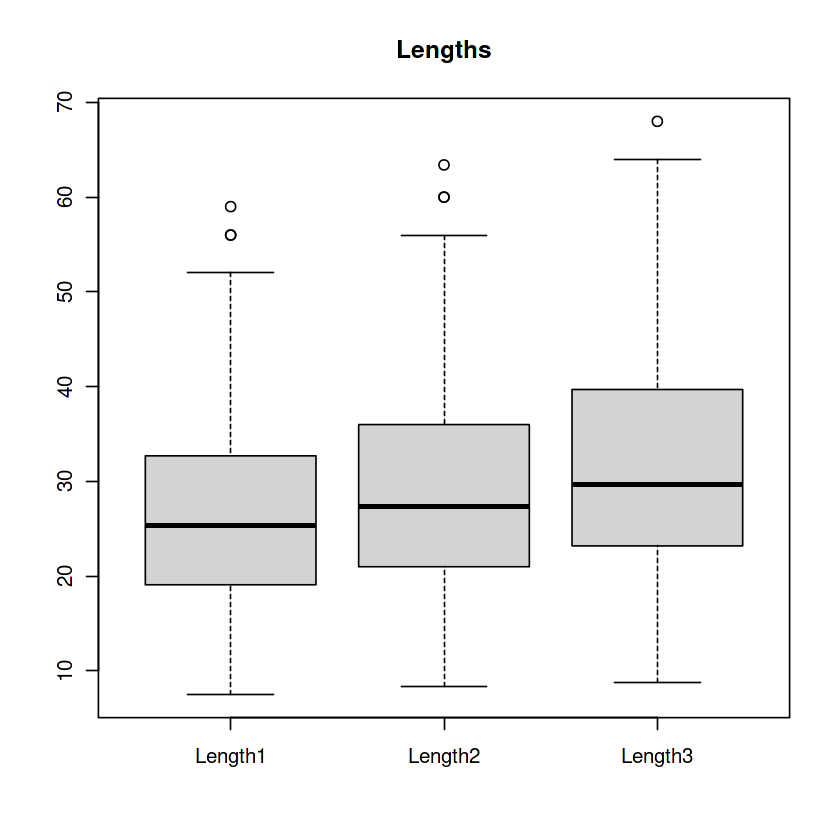

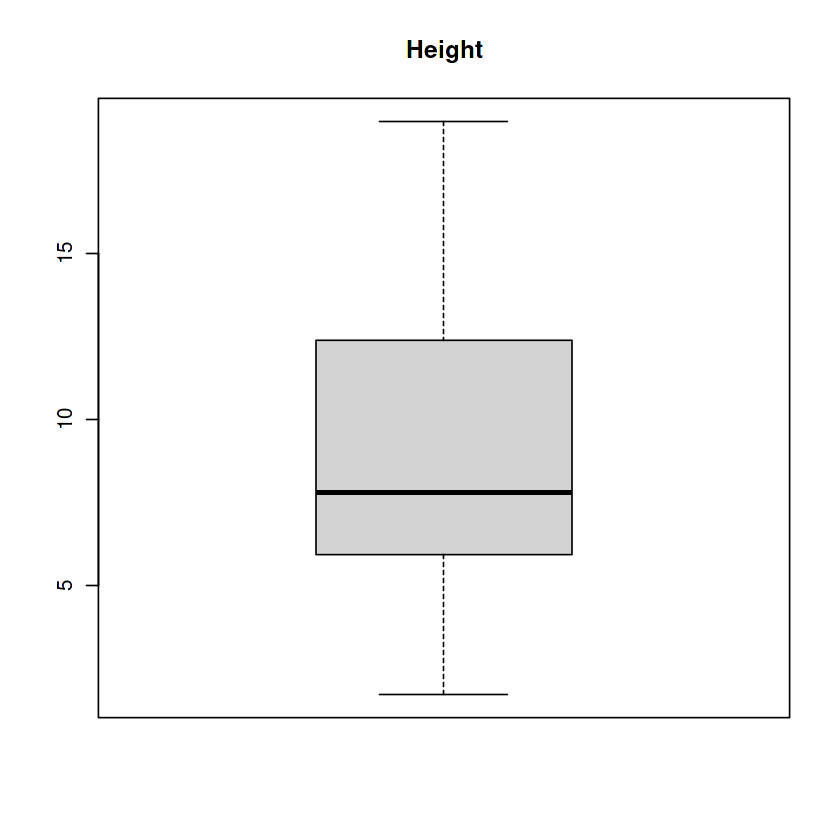

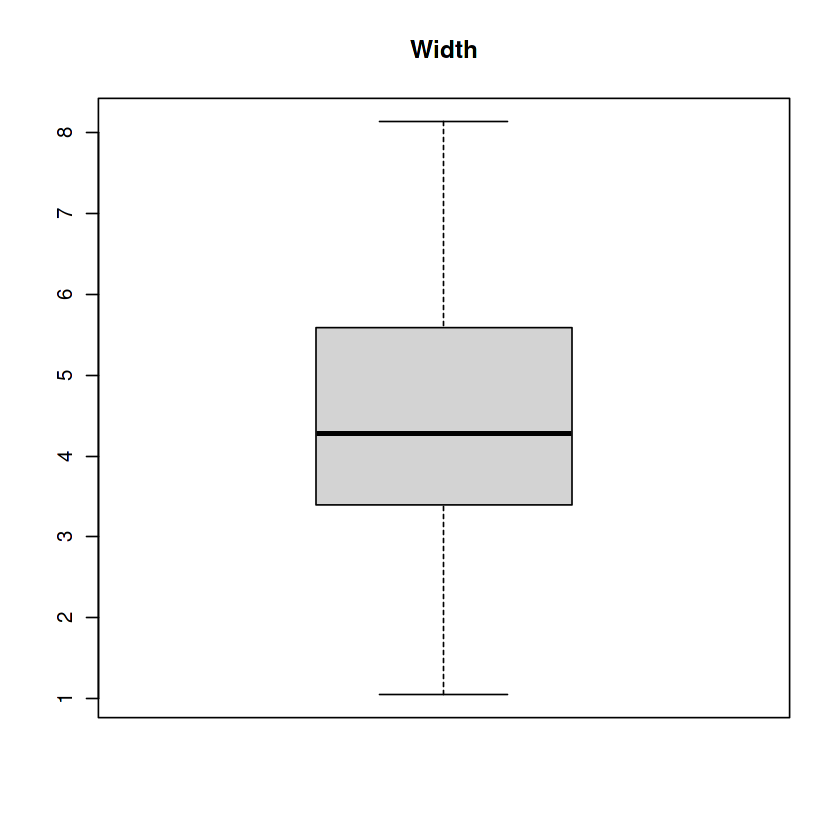

In [201]:
boxplot(fish$Weight, main="Weight")
boxplot(fish[,c(3,4,5)], main="Lengths")
boxplot(fish$Height, main="Height")
boxplot(fish$Width, main="Width")


There are some outliers present in Weight and Length column so we need to remove those values.

> #  Removing Outliers

In [202]:
fish <- fish%>%
  filter(Weight<1500)

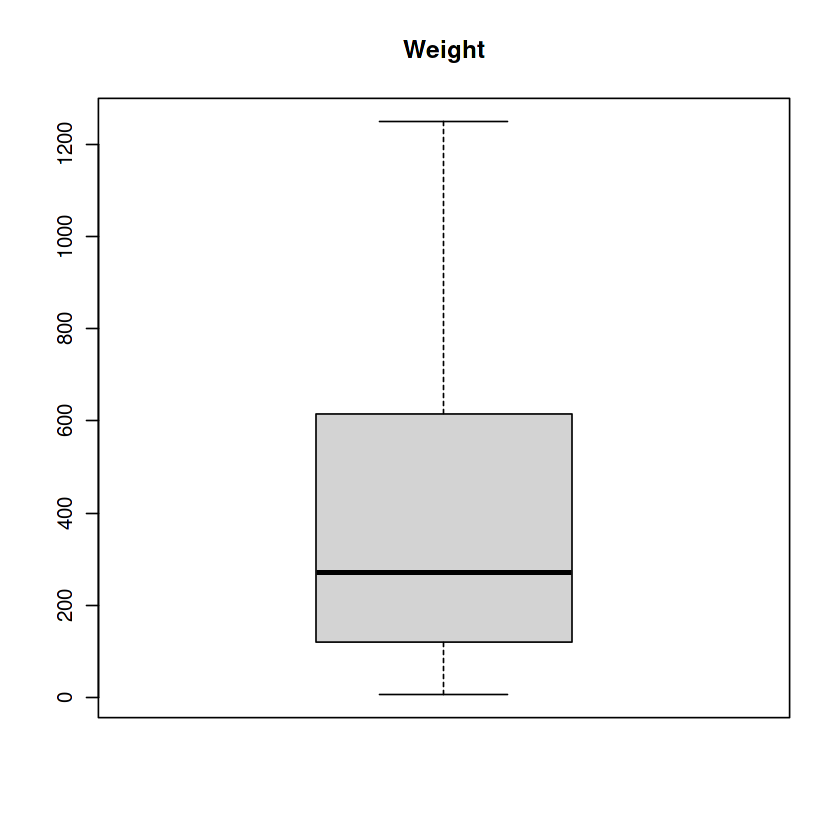

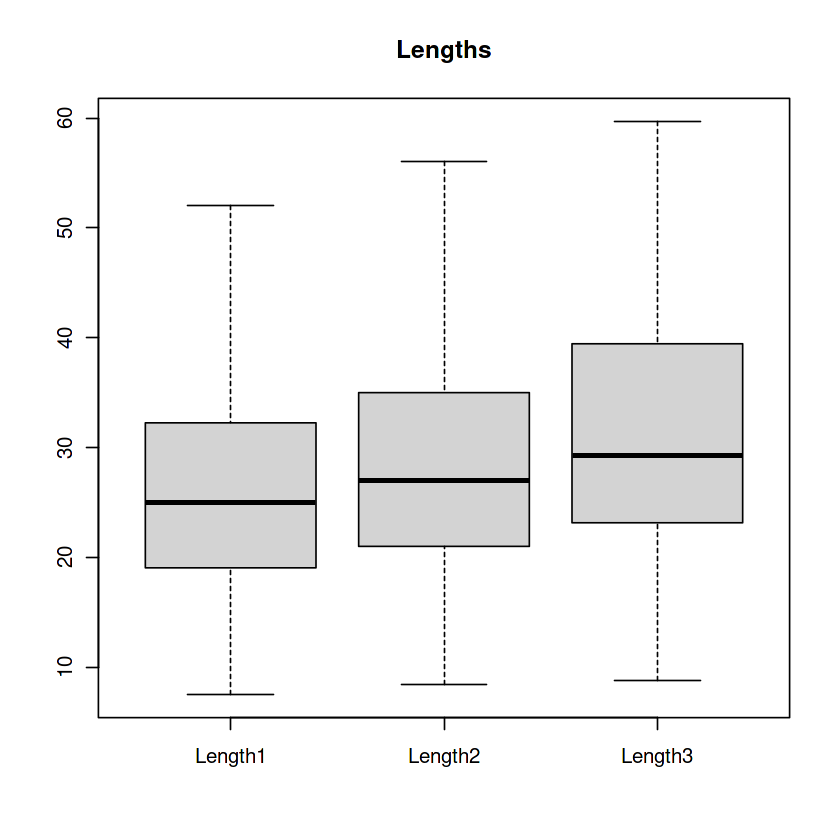

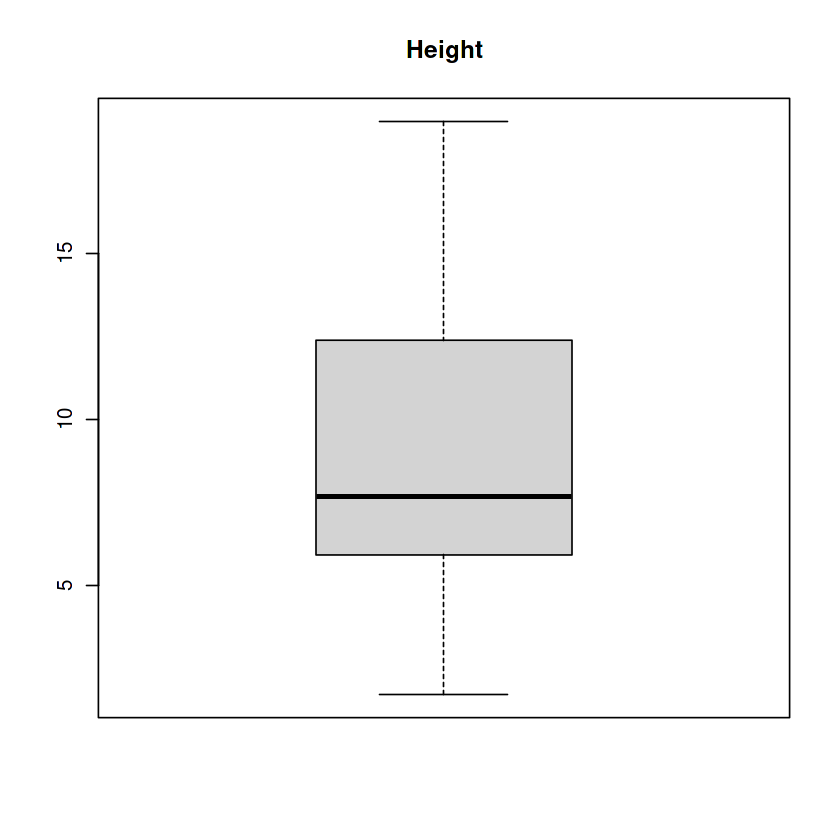

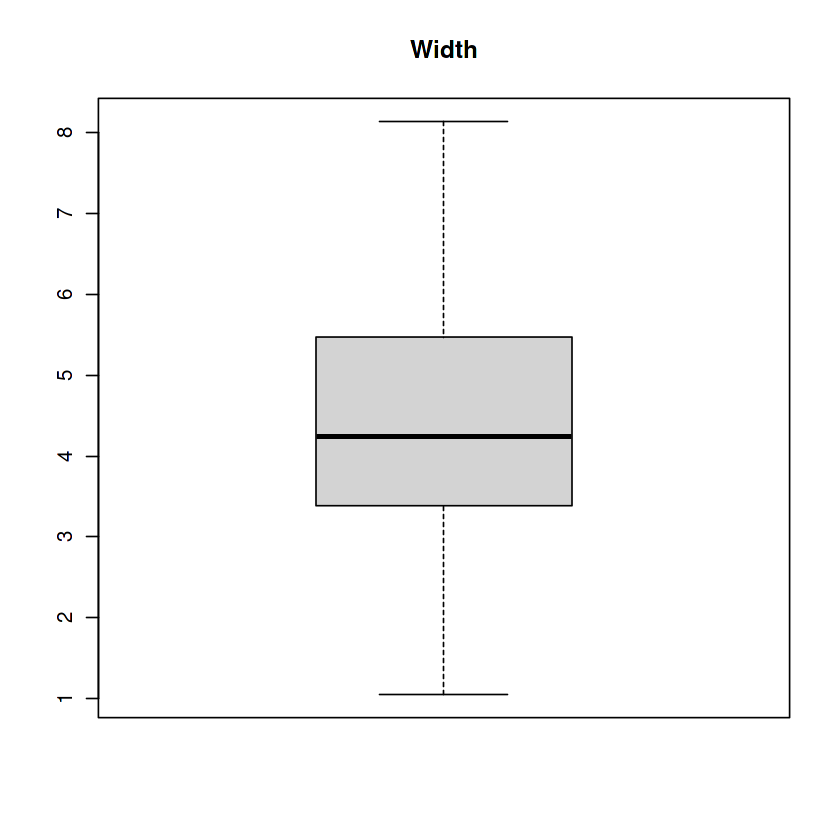

In [203]:
b1 = boxplot(fish$Weight, main="Weight")
b2 = boxplot(fish[,c(3,4,5)], main="Lengths")
b3 = boxplot(fish$Height, main="Height")
b4 = boxplot(fish$Width, main="Width")

Now we can see there are no outliers in the above boxplots. We can move forward with our correlation analysis.

> # Correlation Table

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.0000000,0.8957401,0.8997339,0.9073728,0.8019538,0.9240291
Length1,0.8957401,1.0000000,0.9994169,0.9905800,0.6754999,0.8888833
Length2,0.8997339,0.9994169,1.0000000,0.9930258,0.6911658,0.8953243
Length3,0.9073728,0.9905800,0.9930258,1.0000000,0.7554163,0.8967933
Height,0.8019538,0.6754999,0.6911658,0.7554163,1.0000000,0.8000913
Width,0.9240291,0.8888833,0.8953243,0.8967933,0.8000913,1.0000000


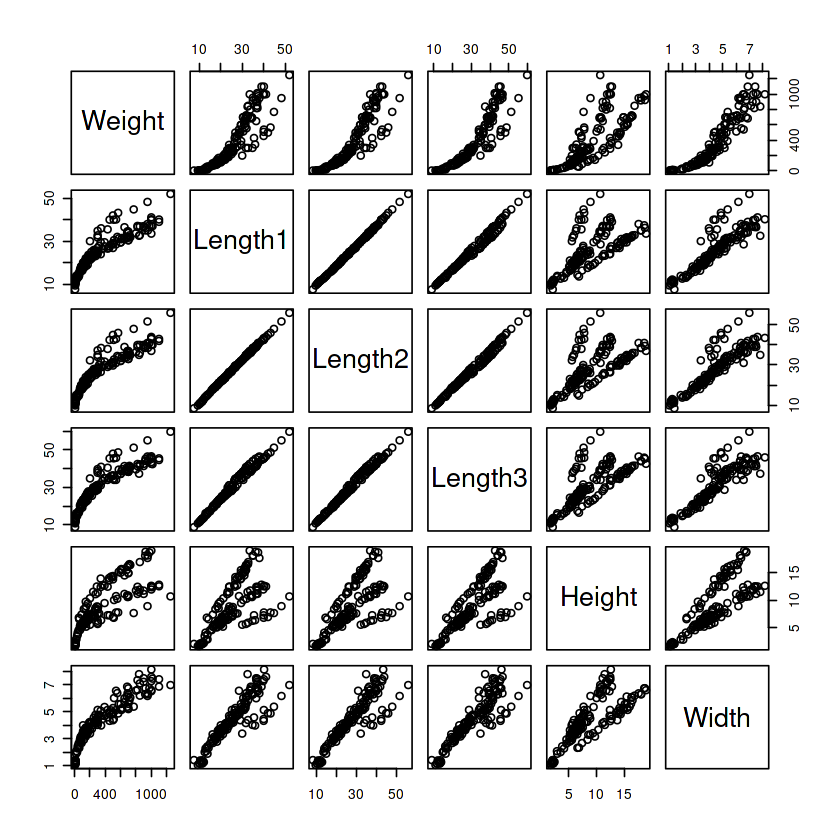

In [204]:
cor(fish[,-1])
pairs(fish[,-1])

In [205]:
round(cor(fish[,-1]),3)

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000,0.896,0.900,0.907,0.802,0.924
Length1,0.896,1.000,0.999,0.991,0.675,0.889
Length2,0.900,0.999,1.000,0.993,0.691,0.895
Length3,0.907,0.991,0.993,1.000,0.755,0.897
Height,0.802,0.675,0.691,0.755,1.000,0.800
Width,0.924,0.889,0.895,0.897,0.800,1.000


Looking at the correlation table we can say that Weight is highly correlated with all the variables.

# **Data Partition**

> # Spliting model into training and testing

In [206]:
set.seed(1234)
ind=sample(2,nrow(fish),replace=TRUE,prob=c(0.7,0.3))
training=fish[ind==1,]
testing=fish[ind==2,]
head(training)
head(testing)

,Species,Weight,Length1,Length2,Length3,Height,Width
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Bream,242,23.2,25.4,30.0,11.5200,4.0200
2,Bream,290,24.0,26.3,31.2,12.4800,4.3056
3,Bream,340,23.9,26.5,31.1,12.3778,4.6961
4,Bream,363,26.3,29.0,33.5,12.7300,4.4555
6,Bream,450,26.8,29.7,34.7,13.6024,4.9274
7,Bream,500,26.8,29.7,34.5,14.1795,5.2785


,Species,Weight,Length1,Length2,Length3,Height,Width
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5,Bream,430,26.5,29,34.0,12.4440,5.1340
14,Bream,340,29.5,32,37.3,13.9129,5.0728
16,Bream,600,29.4,32,37.2,15.4380,5.5800
26,Bream,725,31.8,35,40.9,16.3600,6.0532
28,Bream,714,32.7,36,41.5,16.5170,5.8515
29,Bream,850,32.8,36,41.6,16.8896,6.1984


In [207]:
library(faraway)


model <- lm(Weight ~ Length1 + Length2 + Length3 + Width + Height,
                data = training)
summary(model)


vif(model)


Call:
lm(formula = Weight ~ Length1 + Length2 + Length3 + Width + Height, 
    data = training)

Residuals:
    Min      1Q  Median      3Q     Max 
-135.04  -65.26  -20.85   35.28  324.65 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -437.689     28.429 -15.396  < 2e-16 ***
Length1       83.085     35.361   2.350   0.0206 *  
Length2      -37.326     37.685  -0.990   0.3241    
Length3      -25.449     15.452  -1.647   0.1024    
Width         40.902     20.584   1.987   0.0494 *  
Height        34.291      7.674   4.468 1.92e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 92.75 on 110 degrees of freedom
Multiple R-squared:  0.9084,	Adjusted R-squared:  0.9043 
F-statistic: 218.3 on 5 and 110 DF,  p-value: < 2.2e-16


Length1    Length2    Length3      Width     Height 
1220.16065 1602.34940  328.77206   13.57098   14.99299

All the lengths have high vif values. But Length3 has much lower values than the other two. let's predict another model with just the lengths.

In [208]:
model1 <- lm(Weight ~ Length1 + Length2 + Length3,
                data = training)
summary(model1)


vif(model1)


Call:
lm(formula = Weight ~ Length1 + Length2 + Length3, data = training)

Residuals:
    Min      1Q  Median      3Q     Max 
-266.86  -60.13  -25.67   79.45  364.75 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -470.587     35.724 -13.173  < 2e-16 ***
Length1      -59.643     40.144  -1.486  0.14017    
Length2       49.046     43.172   1.136  0.25836    
Length3       32.715      9.791   3.341  0.00113 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 119.1 on 112 degrees of freedom
Multiple R-squared:  0.8463,	Adjusted R-squared:  0.8422 
F-statistic: 205.5 on 3 and 112 DF,  p-value: < 2.2e-16


Length1    Length2    Length3 
 953.85377 1275.54101   80.06879

Again we found that the Length3 has a lower value.

In [209]:
model2 <- lm(Weight ~ Length3+Width + Height,
                data = training)
summary(model2)


vif(model2)


Call:
lm(formula = Weight ~ Length3 + Width + Height, data = training)

Residuals:
    Min      1Q  Median      3Q     Max 
-130.32  -67.67  -40.84   44.66  301.82 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -460.444     28.685 -16.052  < 2e-16 ***
Length3       12.798      2.096   6.106 1.51e-08 ***
Width         71.655     14.961   4.789 5.16e-06 ***
Height        13.484      3.492   3.862 0.000189 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 96.67 on 112 degrees of freedom
Multiple R-squared:  0.8987,	Adjusted R-squared:  0.896 
F-statistic: 331.3 on 3 and 112 DF,  p-value: < 2.2e-16


Length3    Width   Height 
5.567407 6.599434 2.857065

In the model2 all the vif values are less than 10. So, we are going to take those variable for futher analysis.

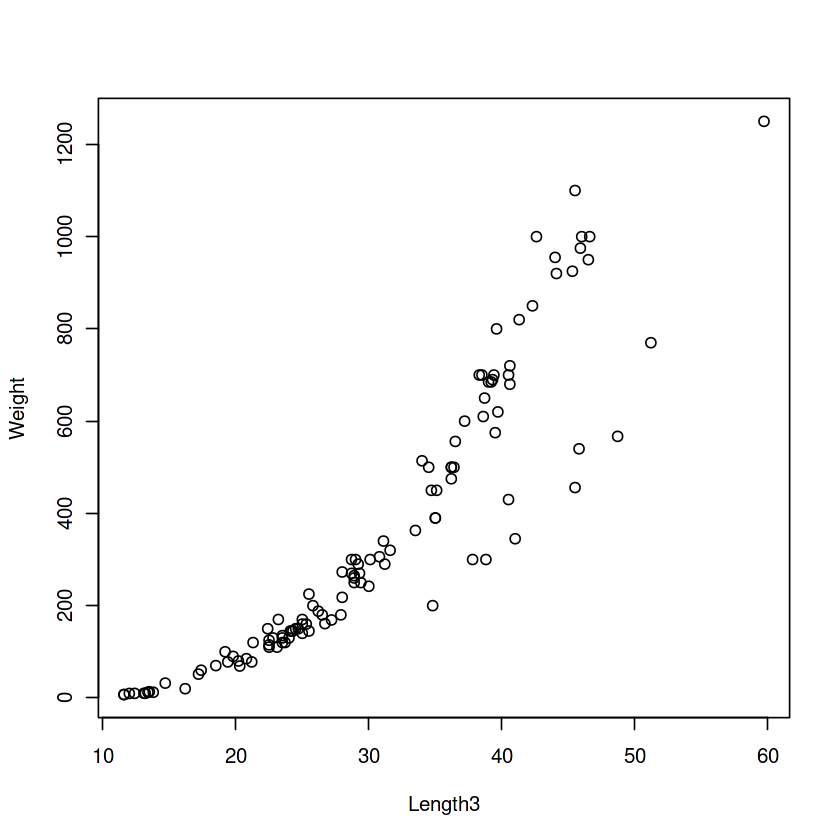

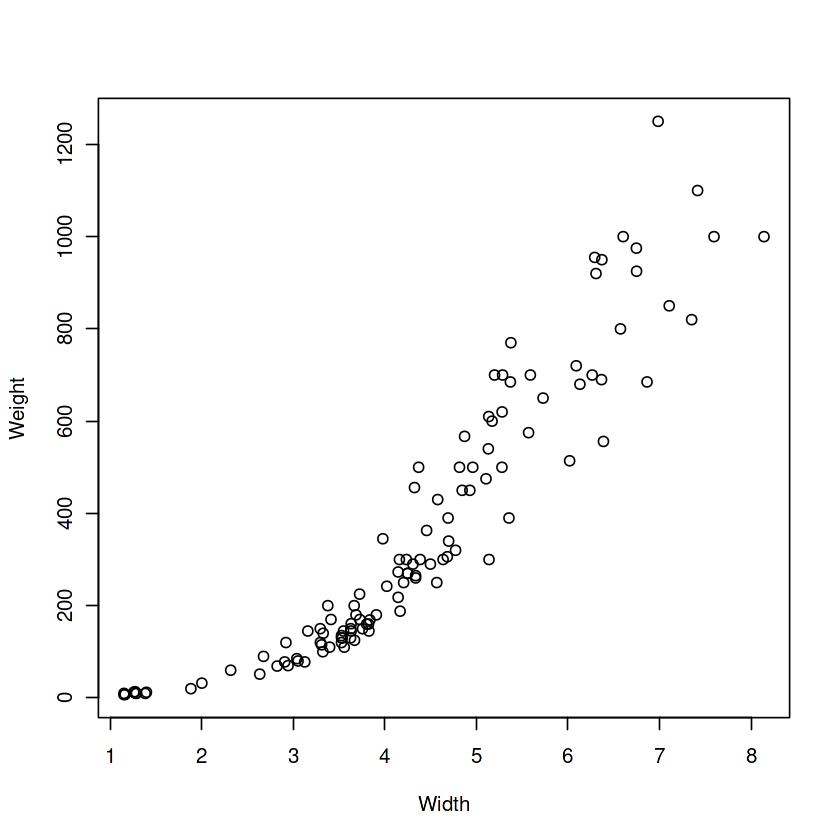

Warning message in abline(model2, col = "blue"):
“only using the first two of 4 regression coefficients”


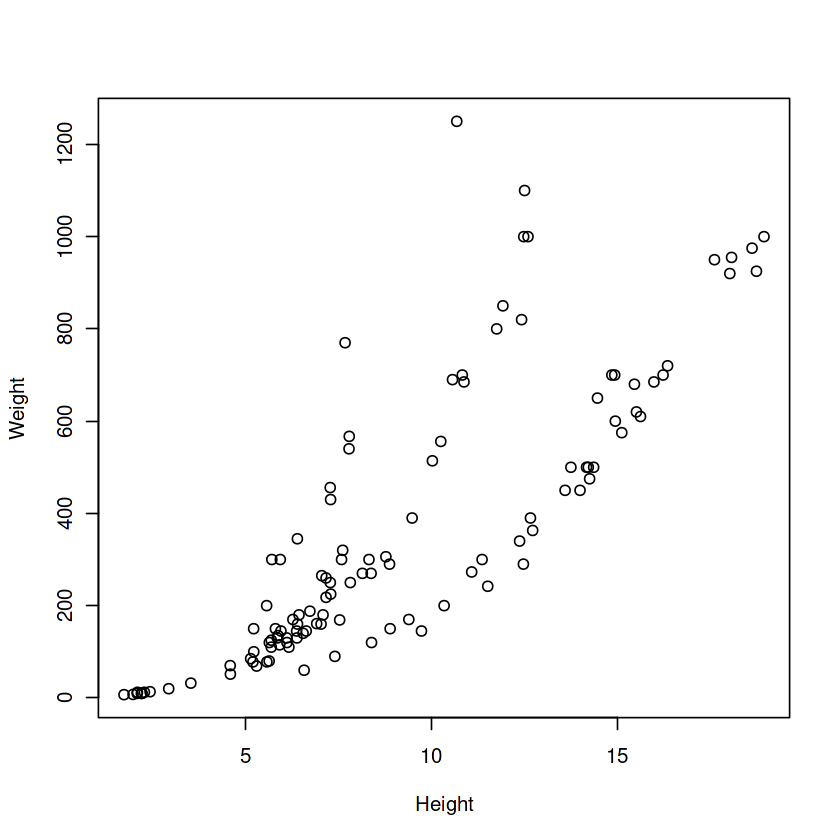

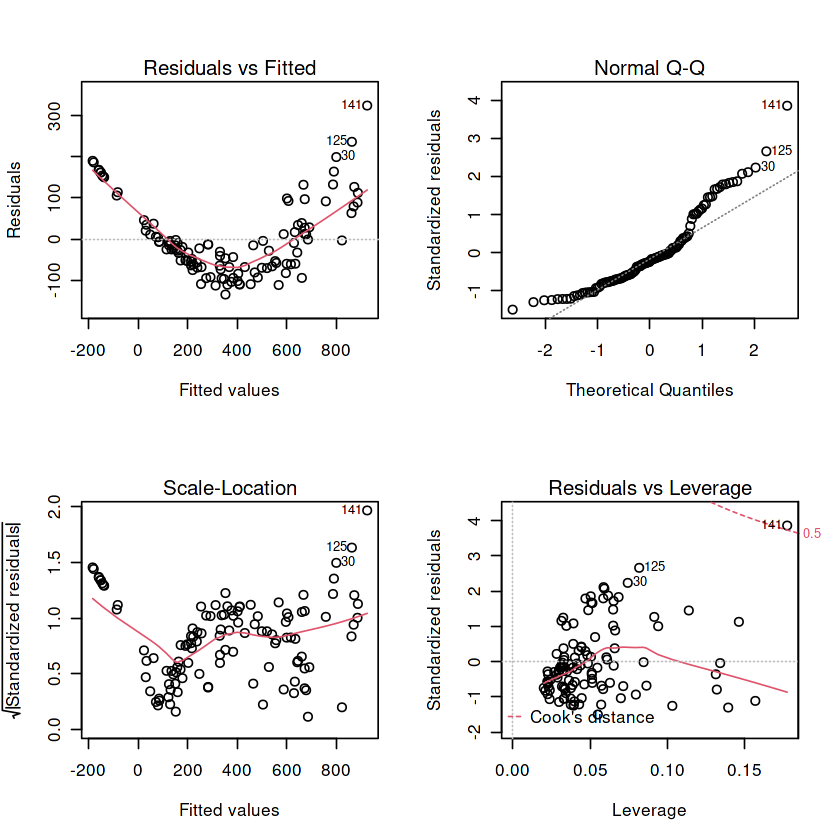

In [210]:
plot(Weight~ Length3+Width+Height,training)
abline(model2,col="blue")
par(mfrow=c(2,2))
plot(model)

In [211]:
pred=predict(model2,testing)
head(pred)
head(testing)

tail(pred)
tail(testing)

5       14       16       26       28       29 
510.3543 568.0084 623.6372 717.3284 712.6712 743.8325

,Species,Weight,Length1,Length2,Length3,Height,Width
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5,Bream,430,26.5,29,34.0,12.4440,5.1340
14,Bream,340,29.5,32,37.3,13.9129,5.0728
16,Bream,600,29.4,32,37.2,15.4380,5.5800
26,Bream,725,31.8,35,40.9,16.3600,6.0532
28,Bream,714,32.7,36,41.5,16.5170,5.8515
29,Bream,850,32.8,36,41.6,16.8896,6.1984


137        140        142        147        149        154 
 598.51925  807.27040 -223.71637 -180.42713 -179.39851  -79.05568

,Species,Weight,Length1,Length2,Length3,Height,Width
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
137,Pike,500.0,42.0,45.0,48.0,6.9600,4.8960
140,Pike,950.0,48.3,51.7,55.1,8.9262,6.1712
142,Smelt,6.7,9.3,9.8,10.8,1.7388,1.0476
147,Smelt,8.7,10.8,11.3,12.6,1.9782,1.2852
149,Smelt,9.9,11.3,11.8,13.1,2.2139,1.1659
154,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


We can see the predicted values and the actual values are differs a lot and in some of the cases we are getting negative weights which is impossible. All the negative values are only occuring in the case of Smelt Species. Considering the other Species we can see less differecnce in the predicted and actual values. So, after eliminating Smelt Species we can predict the weight much better and approximately.